# Week 1: Estimation Theory

## Least Square Estimator (LSE)

### Demo 1 - LS estimate of a linear model
Let's find the least squares fit for a toy dataset.

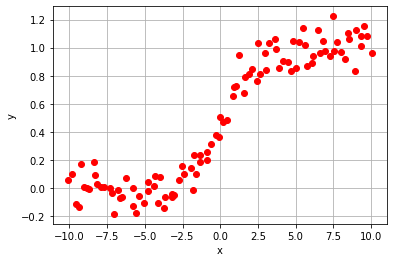

In [1]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(2017)

x = np.linspace(-10,10,100)
y = 1 / (1 + np.exp(-x))

x = x + 0.1 * np.random.randn(x.size)
y = y + 0.1 * np.random.randn(y.size)

plt.plot(x, y, 'ro')
plt.xlabel("x")
plt.ylabel("y")
plt.axis('tight')
plt.grid()
plt.show()

We need to fit a linear model
$$
y = ax+b
$$
to the given data points $y[n]$,$x[n]$. Let's first use the closed form formulas for $a$ and $b$ that you derived during the introductory course:
$$
  \begin{split}
a &= \frac{N\sum_{i=1}^N x_iy_i-\sum_{i=1}^N y_i\sum_{i=1}^N x_i}{N\sum_{i=1}^N x^2_i-\sum_{i=1}^N x_i\sum_{i=1}^Nx_i} \\
b &= \frac{-a\sum_{i=1}^N x_i+\sum_{i=1}^N y_i}{N}
  \end{split}  \enspace .
$$


In [2]:
N = len(x)
a = (N*np.sum(x*y)-sum(y)*sum(x))/(N*sum(x*x)-sum(x)*sum(x))
b = (-a*sum(x)+sum(y))/N
print(f'a={a:.4f} and b={b:.4f}')

a=0.0729 and b=0.4817


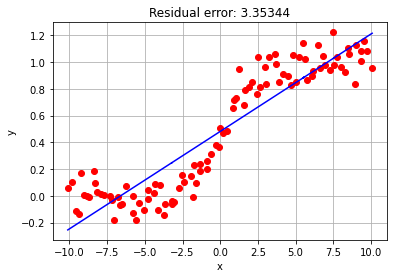

In [3]:
plt.plot(x, y, 'ro')
plt.plot(x, a*x + b, 'b-')

plt.xlabel("x")
plt.ylabel("y")
plt.axis('tight')
plt.grid()
plt.title('Residual error: %.5f' % (np.sum((y - (a*x + b))**2)))
plt.show()

### Demo 2 - LS estimate in the matrix form

However, next we need to turn to the matrix form of the LS estimator to make more powerful things. The matrix form that represents $N$ linear equations is
$$
\mathbf{y} = \mathbf{X}\mathbf{\theta} .
$$
The LS esimator provides a solution that minimizes the residual error $J(\mathbf{\theta}) = (\mathbf{y} - \mathbf{X}\mathbf{\theta})^T(\mathbf{y} - \mathbf{X}\mathbf{\theta})$. 

The solution is
$$
\mathbf{\theta}^T = \mathbf{y}^T\mathbf{X}(\mathbf{X}^T\mathbf{X})^{-1} \enspace .
$$

In [4]:
a=0
b=0

# We form the sample matrix
X = np.column_stack([x, np.ones_like(x)])
print(X)

# We solve the model parameters in theta
#theta = np.dot(np.dot(np.linalg.inv(np.dot(X.T, X)), X.T), y) # Heikki :-)
theta = np.dot(np.dot(y.T,X), np.linalg.inv(np.dot(X.T, X))) # Joni
# theta = y.T @ X @ np.linalg.inv(X.T @ X) # with operator overloading
a, b = theta
print(f'a={a:.4f} and b={b:.4f}')

[[-10.10229453   1.        ]
 [ -9.8120196    1.        ]
 [ -9.57605037   1.        ]
 [ -9.3365918    1.        ]
 [ -9.23137698   1.        ]
 [ -9.04272323   1.        ]
 [ -8.86223733   1.        ]
 [ -8.6706234    1.        ]
 [ -8.35492399   1.        ]
 [ -8.2666791    1.        ]
 [ -8.13618477   1.        ]
 [ -7.8736858    1.        ]
 [ -7.71880657   1.        ]
 [ -7.28255711   1.        ]
 [ -7.15027183   1.        ]
 [ -7.01427163   1.        ]
 [ -6.78761036   1.        ]
 [ -6.6100687    1.        ]
 [ -6.48709317   1.        ]
 [ -6.27054918   1.        ]
 [ -5.80856724   1.        ]
 [ -5.79286166   1.        ]
 [ -5.57643078   1.        ]
 [ -5.35465987   1.        ]
 [ -5.05868723   1.        ]
 [ -4.80504033   1.        ]
 [ -4.78581684   1.        ]
 [ -4.36355976   1.        ]
 [ -4.30395818   1.        ]
 [ -4.12280112   1.        ]
 [ -3.98764735   1.        ]
 [ -3.74696629   1.        ]
 [ -3.685511     1.        ]
 [ -3.20215159   1.        ]
 [ -3.223086  

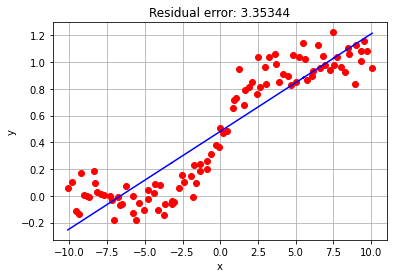

In [5]:
plt.plot(x, y, 'ro')
plt.plot(x, a*x + b, 'b-')

plt.xlabel("x")
plt.ylabel("y")
plt.axis('tight')
plt.grid()
plt.title('Residual error: %.5f' % (np.sum((y - (a*x + b))**2)))
plt.show()

### Demo 3 - Higher order polynomial LSE 

The nice property of the LSE in the matrix form is that it is not limited to the first degree polynomials anymore, but you can form the "data matrix" $\mathbf{X}$ for any degree. Let's try the second order polynomial:
$$
y[n] = ax^2[n] + bx[n] + c .
$$

Also: we use the ready-made function `np.linalg.lstsq` to solve the "Least-Square fit".

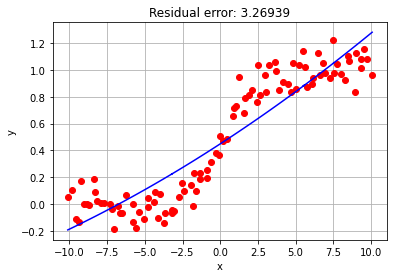

In [6]:
# Second order polynomial
X = np.column_stack([x**2, x, np.ones_like(x)])
theta, residual, _, _ = np.linalg.lstsq(X, y,rcond=None)

a, b, c = theta
plt.plot(x, y, 'ro')
plt.plot(x, a*x**2 + b*x + c, 'b-')

plt.xlabel("x")
plt.ylabel("y")
plt.axis('tight')
plt.title('Residual error: %.5f' % (residual))
plt.grid()
plt.show()

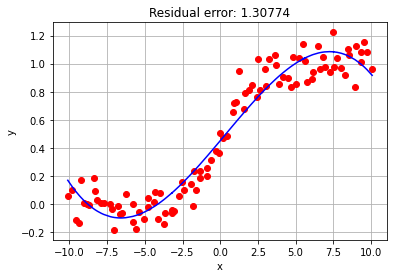

In [7]:
# Third order polynomial
X = np.column_stack([x**3, x**2, x, np.ones_like(x)])
theta, residual, _, _ = np.linalg.lstsq(X, y,rcond=None)

a, b, c, d = theta
plt.plot(x, y, 'ro')
plt.plot(x, a*x**3 + b*x**2 + c*x + d, 'b-')

plt.xlabel("x")
plt.ylabel("y")
plt.axis('tight')
plt.title('Residual error: %.5f' % (residual))
plt.grid()
plt.show()

### Demo 4 - Regularisation in linear regression

However, next we need to turn to the matrix form of the LS estimator to make more powerful things. The matrix form that represents $N$ linear equations is
$$
\mathbf{y} = \mathbf{X}\mathbf{\theta} .
$$
The LS esimator provides a solution that minimizes the residual error $J(\mathbf{\theta}) = (\mathbf{y} - \mathbf{X}\mathbf{\theta})^T(\mathbf{y} - \mathbf{X}\mathbf{\theta})$. 

[-1.01323323e+01 -1.28788243e+01 -2.33977009e-01  4.84739870e+00
  1.44594459e+00 -3.42935957e-01 -2.00400913e-01 -1.94928056e-02
  2.52242585e-03  5.37843326e-04  2.49287561e-05]
30.104391803566728


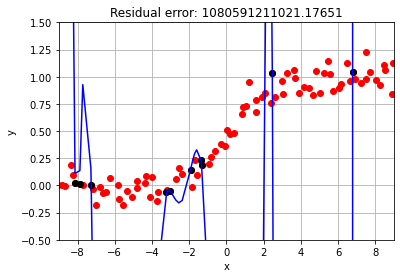

In [8]:
import random

np.random.seed(2016)

# Let's reduce the number of samples until things get weird by one
N_pol = 10 # 1,2,5,10
N = 10

rand_inds = np.random.randint(0,x.size-1,N)
x_train=x[rand_inds]
y_train=y[rand_inds]
#x_train = np.append(x_train,x[0])
#y_train = np.append(y_train,y[0])
#x_train = np.append(x_train,x[-1])
#y_train = np.append(y_train,y[-1])

# N_pol order polynomial
X = np.ones_like(x_train)
for n_pol in range(1,N_pol+1):
    X = np.column_stack([X, x_train**n_pol])

#X = np.column_stack([x_train**7, x_train**6, x_train**5, x_train**4, x_train**3, x_train**2, x_train, np.ones_like(x_train)])
theta = np.dot(np.dot(y_train.T,X), np.linalg.inv(np.dot(X.T, X))) # Joni
print(theta)
print(np.sum(np.abs(theta)))

y_pred = np.ones_like(x)*theta[0]
for n_pol in range(1,N_pol+1):
    y_pred = y_pred+x**n_pol*theta[n_pol]



plt.plot(x, y, 'ro')
plt.plot(x_train, y_train, 'ko')
#plt.plot(x, theta[0]*x**7+theta[1]*x**6+theta[2]*x**5+theta[3]*x**4+theta[4]*x**3+theta[5]*x**2+theta[6]*x+theta[7], 'b-')
plt.plot(x, y_pred, 'b-')
residual = np.sum((y - y_pred)**2)

plt.xlabel("x")
plt.ylabel("y")
plt.axis('tight')
plt.title('Residual error: %.5f' % residual)
plt.xlim([-9, 9])
plt.ylim([-0.5, 1.5])
plt.grid()
plt.show()

[ 2.57402806e-01  9.09291098e-01  2.26271405e-01  2.05962560e-02
  2.20583624e-01 -8.72981070e-01 -3.17635058e-01  6.88330391e-04
 -7.64616653e-01 -6.70739665e-02  3.08771330e-01]
3.9659115989179714


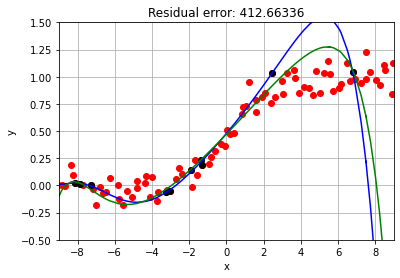

In [9]:
from sklearn.linear_model import Ridge

np.random.seed(2016)

# Let's reduce the number of samples until things get weird by one
N_pol = 10
N = 10
l = 0.0001 # My implementation
a = 0.01  # sklearn (note that working is inverse, i.e. the smaller the stronger)

rand_inds = np.random.randint(0,x.size-1,N)
x_train=x[rand_inds]
y_train=y[rand_inds]

# N_pol order polynomial
X_train = np.ones_like(x_train)
X = np.ones_like(x)
for n_pol in range(1,N_pol+1):
    X_train = np.column_stack([X_train, x_train**n_pol])
    X = np.column_stack([X, x**n_pol])
#X_train = np.column_stack([x_train**7, x_train**6, x_train**5, x_train**4, x_train**3, x_train**2, x_train**1, np.ones_like(x_train)])
#X = np.column_stack([x**7, x**6, x**5, x**4, x**3, x**2, x**1, np.ones_like(x)])

# Normalize
X_train_mean = np.mean(X_train,axis=0)
X_train_std = np.std(X_train, axis=0)
#print(X_train_std)
X_train_std[0] = 1 # To avoid division by zero

X_train_norm = X_train-X_train_mean
X_norm = X-X_train_mean

X_train_norm = X_train_norm/X_train_std
X_norm = X_norm/X_train_std
X_train_norm[...,0] = 1 # Fix the first entry with 0 std
X_norm[...,0] = 1 # Fix the first entry with 0 std

# Ridge regression
theta = np.dot(np.dot(y_train.T,X_train_norm), np.linalg.inv(np.dot(X_train_norm.T, X_train_norm)+l*np.eye(X_train_norm.shape[1]))) # Joni
print(theta)
print(np.sum(np.abs(theta)))

clf = Ridge(alpha=a, normalize=True, solver='cholesky')
clf.fit(X_train, y_train)
Ridge()


y_ridge = clf.predict(X)
y_own = X_norm @ theta

plt.plot(x, y, 'ro') # all
plt.plot(x_train, y_train, 'ko') # training
plt.plot(x, y_own, 'b-' )
plt.plot(x, y_ridge, 'g-')
residual = np.sum((y - y_own)**2)

plt.xlabel("x")
plt.ylabel("y")
plt.axis('tight')
plt.title('Residual error: %.5f' % residual)
plt.grid()
plt.xlim([-9, 9])
plt.ylim([-0.5, 1.5])
plt.show()

### Demo 5 - House price estimation
This practical application is described in a separate Jupyter notebook.

## Maximum Likelihood (ML) Estimator

### Demo: Likelihood for various $\theta=A$

In [10]:
# Imports for this demo
import numpy as np
import matplotlib.pyplot as plt

In [11]:
def gaussian(x, mu, sig):
    Z = (1/np.sqrt(2*np.pi*sig**2.))
    return Z * np.exp(-np.power(x - mu, 2.) / (2 * np.power(sig, 2.)))

def gaussian_log(x, mu, sig):
    Z = (1/np.sqrt(2*np.pi*sig**2.))
    return np.log(Z) + (-np.power(x - mu, 2.) / (2 * np.power(sig, 2.)))

[ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10.]


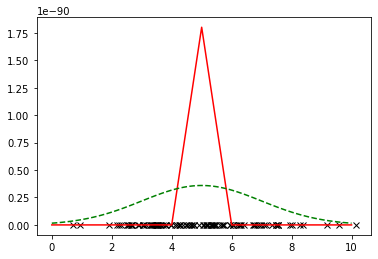

In [12]:
A_gt = 5
sigma2 = 2
N = 100
x = A_gt + sigma2 * np.random.randn(N)

plt.plot(x,np.zeros(x.size),'kx')

A_est = np.linspace(0, 10, 11)
print(A_est)
likelih = np.zeros(A_est.size)
for idx, A_t in enumerate(A_est):    
    likelih[idx] = np.prod(gaussian(x,A_t,sigma2))
plt.plot(A_est,likelih,'r-')

maxid = np.argmax(likelih)  
plt.plot(np.linspace(0,10,101),np.max(likelih)*gaussian(np.linspace(0,10,101),A_est[maxid],sigma2),'g--')
plt.show()

### Demo 6: Two estimators of A - ML vs. the first sample (Two_Estimators) - TBD

### Demo 7: $p(X;A)$ vs. $ln(p(X;A))$ (Likelihoods) - TBD

### Demo 8: Sinusoid frequency, amplitude and phase - TBD

## References

S.M. Kay (1993): Fundamentals of Statistical Signal Processing - Estimation Theory, Vol. 1, Chapters 7-8.